In [122]:
import pandas as pd
import nltk
from clean import *
from faces import *

import pickle

from PIL import Image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

import wget

frontalface_default_path = "cascades/haarcascade_frontalface_default.xml"
frontalface_alt_path = "cascades/haarcascade_frontalface_alt.xml"
frontalface_alt2_path = "cascades/haarcascade_frontalface_alt2.xml"
profileface_path = "cascades/haarcascade_profileface.xml"


face_cascade = cv2.CascadeClassifier(frontalface_default_path)
facealt_cascade = cv2.CascadeClassifier(frontalface_alt_path)
facealt2_cascade = cv2.CascadeClassifier(frontalface_alt2_path)
profileface_cascasde = cv2.CascadeClassifier(profileface_path)

In [93]:
df.iloc[2,9]

["'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x640_6f4313cc-6142-4166-83b7-75a75af6a8cd.jpg'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_50186489-55b3-437c-b3cf-a9cf0675fb13.jpg'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_3fdfc13e-38b0-43c1-8f25-da0664005fc2.webp'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_1ab1538a-afc6-46f0-806b-92540c15cde1.jpg'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_0d992227-7ff1-4058-bc37-46613de3a008.webp'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x640_3ab26b74-b1d6-4033-898a-37e85f358697.jpg'",
 "'https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_0858c227-a3f1-4415-8d2d-3163e5a32fd3.webp'"]

In [107]:
class User:
    def __init__(self, name, age, college, job, city, gender, distance, details, anthem, profile_pic_urls, faces=[] ):
        self.name = name
        self.age = age
        self.college = college
        self.job = job
        self.city = city
        self.gender = gender
        self.distance = distance
        self.details = details
        self.anthem = anthem
        self.profile_pic_urls = profile_pic_urls
        self.faces = faces

In [8]:
df = pd.read_csv('data/raw/profile_data.csv')
df = clean(df)
df = fill_missing_cities(df)
df = add_location_values(df)

-----------------
CLEANING DATA
...
FOUND 118396 ENTRIES
REMOVED 40960 EMPTY ENTRIES
REMOVED 1224 DUPLICATED ENTRIES
76212 ENTRIES REMAIN
-----------------
FILLING MISSING CITY VALUES
FOUND 57254 MISSING VALUES
1264 MISSING CITY VALUES REMAIN (0.02%)
-----------------
ADDING LOCATION COORDINATE VALUES
COULD NOT FIND LOCATION DATA FOR 1999 ENTRIES (0.03%)


In [174]:
def find_face(img):
    img = Image.open(img).convert('RGB')
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = facealt_cascade.detectMultiScale(gray, 1.1, 4)
    
    print("Found {} faces".format(len(faces)))
    face_arr = []
    for(x , y,  w,  h) in faces:
        face_arr.append(gray[y:y+h,x:x+h])
    for each in face_arr:
        cv2_imshow(each)
    return face_arr

In [175]:
url = 'https://images-ssl.gotinder.com/5e8a352520cc900100c20a28/640x800_75_d5803768-7b74-4068-981c-03cf2c202ced.webp'

In [176]:
img = wget.download(url)

In [177]:
img

'640x800_75_d5803768-7b74-4068-981c-03cf2c202ced (21).webp'

https://images-ssl.gotinder.com/5dc0814dfc09b801007b6c1b/640x800_75_90983506-a499-436b-80d4-d3d7944bf2f6.webp
didn"t work
https://images-ssl.gotinder.com/5dc0814dfc09b801007b6c1b/640x800_75_70d06d7f-7bf8-418b-84b9-d285b139a3db.webp
didn"t work
https://images-ssl.gotinder.com/5dc0814dfc09b801007b6c1b/640x800_75_f6c88ec2-6883-433b-85a6-3086faee56cf.webp
didn"t work
https://images-ssl.gotinder.com/5dc0814dfc09b801007b6c1b/640x800_75_620ec41b-b461-455e-b66e-937810b968c1.webp
didn"t work
https://images-ssl.gotinder.com/5e8a352520cc900100c20a28/640x800_75_d5803768-7b74-4068-981c-03cf2c202ced.webp
640x800_75_d5803768-7b74-4068-981c-03cf2c202ced (22).webp
Found 1 faces


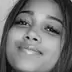

https://images-ssl.gotinder.com/5e8a352520cc900100c20a28/640x800_75_338373a8-a62e-4361-9bfd-877dbe48ac07.webp
640x800_75_338373a8-a62e-4361-9bfd-877dbe48ac07 (14).webp
Found 1 faces


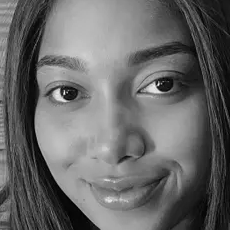

https://images-ssl.gotinder.com/5e8a352520cc900100c20a28/640x800_75_48ca49b8-dbdf-4cd2-9a74-8601f7298fd7.webp
640x800_75_48ca49b8-dbdf-4cd2-9a74-8601f7298fd7 (14).webp
Found 1 faces


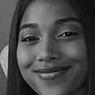

https://images-ssl.gotinder.com/5e8a352520cc900100c20a28/640x800_75_21d1e67a-b3c4-4fc6-83c0-a51bb8e25d36.webp
640x800_75_21d1e67a-b3c4-4fc6-83c0-a51bb8e25d36 (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x640_6f4313cc-6142-4166-83b7-75a75af6a8cd.jpg
640x640_6f4313cc-6142-4166-83b7-75a75af6a8cd (15).jpg
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_50186489-55b3-437c-b3cf-a9cf0675fb13.jpg
640x800_50186489-55b3-437c-b3cf-a9cf0675fb13 (14).jpg
Found 1 faces


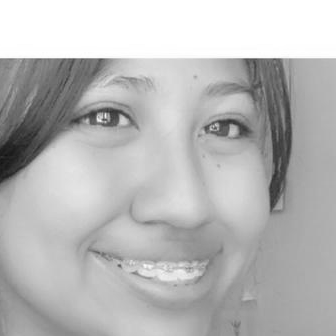

https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_3fdfc13e-38b0-43c1-8f25-da0664005fc2.webp
640x800_75_3fdfc13e-38b0-43c1-8f25-da0664005fc2 (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_1ab1538a-afc6-46f0-806b-92540c15cde1.jpg
640x800_1ab1538a-afc6-46f0-806b-92540c15cde1 (14).jpg
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_0d992227-7ff1-4058-bc37-46613de3a008.webp
640x800_75_0d992227-7ff1-4058-bc37-46613de3a008 (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x640_3ab26b74-b1d6-4033-898a-37e85f358697.jpg
640x640_3ab26b74-b1d6-4033-898a-37e85f358697 (14).jpg
Found 0 faces
https://images-ssl.gotinder.com/5cace3ad9b7a5b1500e1e418/640x800_75_0858c227-a3f1-4415-8d2d-3163e5a32fd3.webp
640x800_75_0858c227-a3f1-4415-8d2d-3163e5a32fd3 (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5e90cb67da1cfb010018b4b5/640x800_75_613e047b-0213-45fb-9b8c-a28b803b0702.w

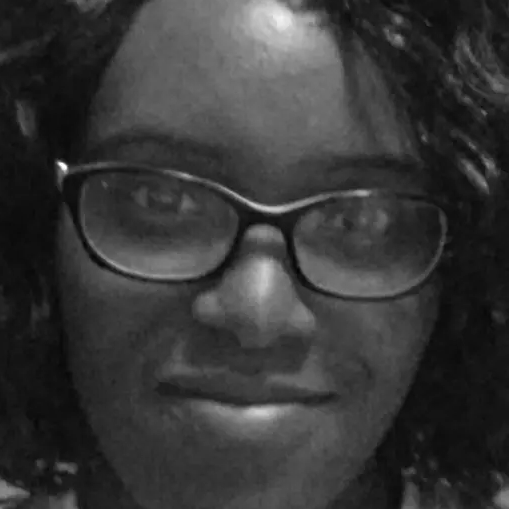

https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_050ae6a2-febb-405e-91e8-d73936e689d0.webp
640x800_75_050ae6a2-febb-405e-91e8-d73936e689d0 (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_0ccd80f5-256d-4689-86d4-5f2d0735390f.webp
640x800_75_0ccd80f5-256d-4689-86d4-5f2d0735390f (14).webp
Found 0 faces
https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_c4db907e-07be-4220-879f-1449022f1cc4.webp
didn"t work
https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_7e3d99f6-8261-4f7f-9886-aab6b62fd104.webp
640x800_75_7e3d99f6-8261-4f7f-9886-aab6b62fd104 (16).webp
Found 0 faces
https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_833e9a46-a754-481f-9e5b-c411498b2a99.webp
didn"t work
https://images-ssl.gotinder.com/5e0ffa53349fdd0100232cd4/640x800_75_ca8d8a28-8421-4f70-9fbc-d1ebfebddeba.webp
640x800_75_ca8d8a28-8421-4f70-9fbc-d1ebfebddeba (14).webp
Found 0 faces


In [178]:
users = []
for i in range(5):
    links = [x.strip('"').strip("'") for x in df.iloc[i,9]]
    faces = []
    for url in links:
        print(url)
        try:
            img = wget.download(url)
            print(img)
            faces.append(find_face(img))
            users.append(User(df.iloc[i,0],
                          df.iloc[i,1],
                          df.iloc[i,2],
                          df.iloc[i,3],
                          df.iloc[i,4],
                          df.iloc[i,5],
                          df.iloc[i,6],
                          df.iloc[i,7],
                          df.iloc[i,8],
                          links,
                          faces))
        except:
            print('Forbidden URL')

In [179]:
users[1].faces

[[array([[196, 194, 194, ...,  32,  89, 173],
         [196, 194, 194, ...,  37,  20, 127],
         [197, 195, 195, ...,  43,  31,  42],
         ...,
         [ 41,  61,  55, ...,  46,  24,  29],
         [ 52,  60,  51, ...,  36,  24,  29],
         [ 53,  60,  50, ...,  31,  29,  30]], dtype=uint8)],
 [array([[135, 134, 134, ...,  25,  25,  23],
         [133, 132, 132, ...,  26,  26,  25],
         [132, 131, 130, ...,  26,  26,  26],
         ...,
         [115, 116, 114, ...,  26,  46,  67],
         [ 87,  86,  84, ...,  26,  46,  66],
         [116, 116,  86, ...,  26,  46,  66]], dtype=uint8)],
 [array([[105, 105, 105, ...,  18,  18,  20],
         [105, 105, 105, ...,  18,  18,  18],
         [105, 105, 105, ...,  18,  18,  18],
         ...,
         [ 78,  78,  78, ...,  21,  23,  24],
         [ 79,  78,  78, ...,  23,  23,  24],
         [ 78,  78,  77, ...,  23,  23,  24]], dtype=uint8)],
 []]

In [24]:
pickle.dump(users, open("users.p", "wb"))